In [25]:
#%pip install jupyter pandas numpy matplotlib seaborn scikit-learn tensorflow xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from xgboost import XGBRegressor

### Conjunto de datos limpio 

In [26]:
df = pd.read_csv('data/avocado_cleaned.csv')

x = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Se entrenan los modelos con `fit` y se generan predicciones con `predict`, evaluando el rendimiento con MSE (error cuadrático medio) y R2 (proporción de varianza explicada)

### Regresión Lineal

Es adecuada para evaluar si las relaciones en los datos son predominantemente lineales, aunque su rendimiento es limitado con patrones no lineales o de alta dimensionalidad

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Random Forest Regressor

Cada árbol se entrena en una submuestra aleatoria de los datos y características, lo que lo hace efectivo para capturar relaciones no lineales y manejar datos de alta dimensionalidad

In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Red neuronal

Este modelo es flexible pero requiere un gran volumen de datos y ajuste, lo que es un desafío con los registros del dataset

In [29]:
nn = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn.compile(optimizer='adam', loss='mse')
nn.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn.predict(x_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

/home/esmeralda/Documentos/Universidad/Ciencia_datos/avocado_prices/avocado_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### Gradient Boosting Regressor (XGBoost)

Construye árboles de decisión de forma secuencial, donde cada árbol corrige los errores del anterior. Utiliza un enfoque optimizando con regularización para prevenir sobre ajuste, lo que lo hace efectivo para los datos estructurados del dataset

In [30]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Support Vector Reggressor (SVR)

Su rendimineto depende de dos parámetros:
- C: Control de penalización 
- Gamma: Control de la influencia de cada punto en la forma de la curva 

Aplicado a un conjunto de datos con muchas características pueden capturar patrones locales y no lineales.

In [31]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

### Guardar métricas 

In [32]:
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network', 'XGBoost', 'SVR'],
    'MSE': [mse_lr, mse_rf, mse_nn, mse_xgb, mse_svr],
    'R2 Score': [r2_lr, r2_rf, r2_nn, r2_xgb, r2_svr]
})
metrics.to_csv('data/model_metrics.csv', index=False)

### Análisis del rendimiento del modelo

Los valores de MSE y R2 proporcionan una visión cuantitativa del rendimiento de cada modelo.

La gráfica de **MSE** muestra la magnitud del error: Modelos con barras más bajas tienen mejor precisión.

La gráfica de **R2** indica la varianza explicada: Barras más altas (cercanas a 1) reflejan un mejor ajuste.

In [33]:
print(f'Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}')
print(f'Random Forest - MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}')
print(f'Neural Network - MSE: {mse_nn:.4f}, R2: {r2_nn:.4f}')
print(f'XGBoost - MSE: {mse_xgb:.4f}, R2: {r2_xgb:.4f}')
print(f'SVR - MSE: {mse_svr:.4f}, R2: {r2_svr:.4f}')

Linear Regression - MSE: 0.5498, R2: 0.4566
Random Forest - MSE: 0.2120, R2: 0.7905
Neural Network - MSE: 0.5753, R2: 0.4314
XGBoost - MSE: 0.2045, R2: 0.7979
SVR - MSE: 1.0082, R2: 0.0035


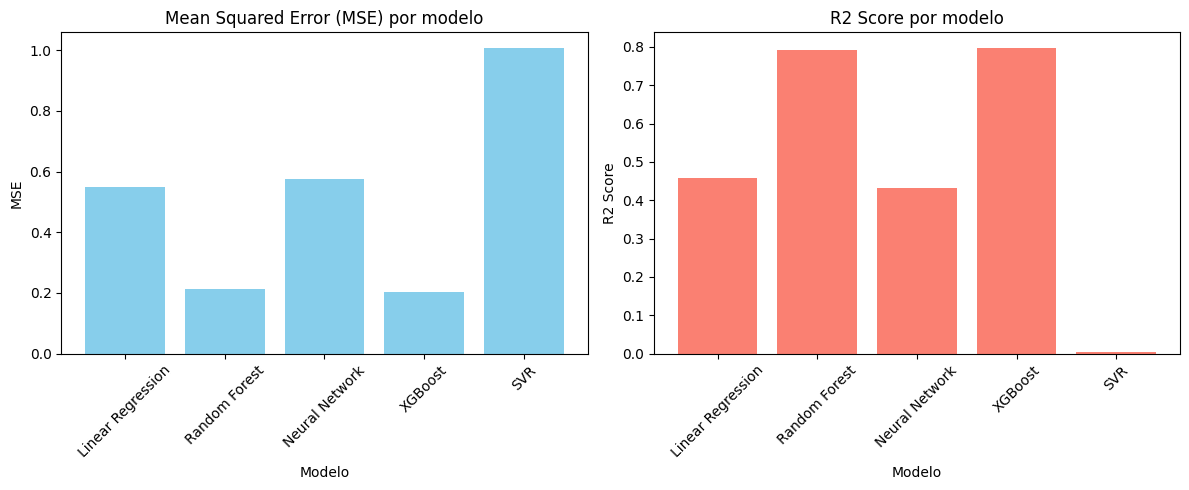

In [34]:
models = ['Linear Regression', 'Random Forest', 'Neural Network', 'XGBoost', 'SVR']
mse_values = [mse_lr, mse_rf, mse_nn, mse_xgb, mse_svr]
r2_values = [r2_lr, r2_rf, r2_nn, r2_xgb, r2_svr]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) por modelo')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='salmon')
plt.title('R2 Score por modelo')
plt.xlabel('Modelo')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Comparación
Basado en el análisis, **XGBoost** o **Random Forest** son las opciones recomendadas para la predicción de `AveragePrice`. XGBoost tiende a ofrecer el mejor equilibrio entre MSE bajo y R² alto debido a su capacidad para capturar interacciones. Random Forest es una alternativa por su simplicidad y estabilidad sin necesidad de ajuste intensivo. La Regresión Lineal es insuficiente debido a la no linealidad inherente, la Red Neuronal requiere más datos y ajuste, y SVR necesita optimización significativa para competir

La clasificación es posible si `AveragePrice` se discretiza en categorías (e.g., bajo, medio, alto), pero perdería precisión en la predicción de precios exactos. El agrupamiento (e.g., K-Means) podría segmentar regiones o patrones de ventas, pero como técnica no supervisada, no predice directamente `AveragePrice`, siendo más útil para análisis exploratorio

### Predicciones gráficas frente a datos reales

Las gráficas de dispersión comparan los valores reales con los predichos (`Valor Predicho`), con una línea roja punteada indicando la predicción perfecta. Cada subplot representa un modelo, permitiendo una visualización directa de su precisión. La dispersión de puntos alrededor de la línea indica el error: menos dispersión sugiere mejor rendimiento, mientras que patronos no alineados reflejan limitaciones del modelo.

Text(0, 0.5, 'Valor Predicho')

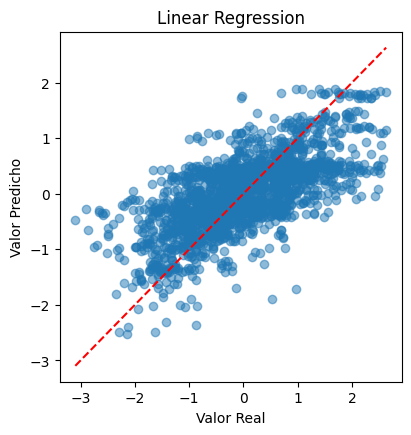

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

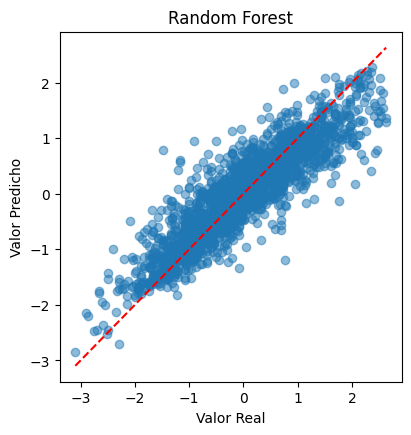

In [36]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

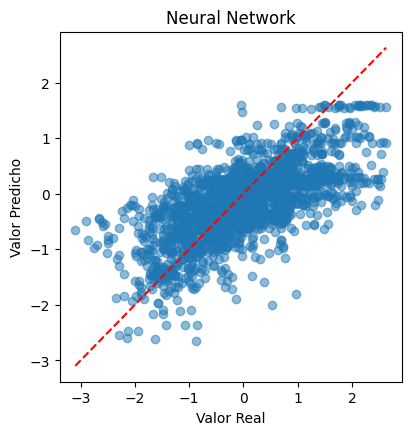

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Neural Network')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

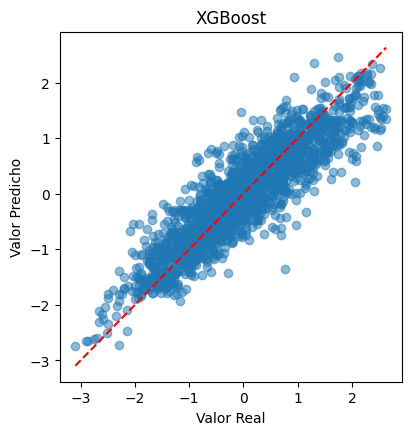

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')

Text(0, 0.5, 'Valor Predicho')

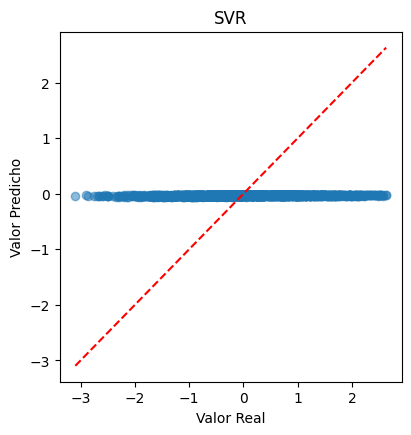

In [39]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('SVR')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')